# Diffie Hellman (Discrete Logarithm Problem)

- One of the earliest public-key algorithms
- Involves a shared secret between two parties, normally Alice and Bob

## Prime Number and Primitive Root

The first step is to initialise our public primitive root and public prime number

We adjust the length of the public prime number following the NIST recommendation below

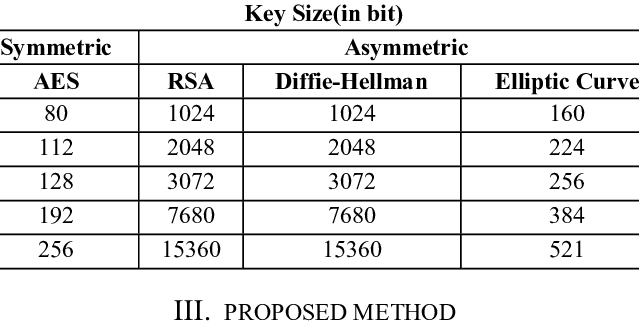
*Amir, Amiruddin & Sari, Riri. (2015). Selecting key generating elliptic curves for Privacy Preserving Association Rule Mining (PPARM). 10.1109/APWiMob.2015.7374930.*

We will utilise openssl to generate the prime number: `openssl prime -generate -bits 1024`
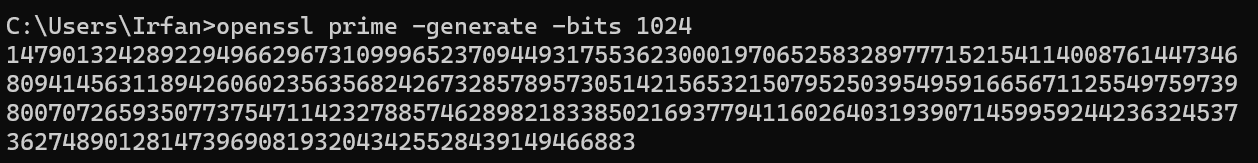

In [32]:
import random

# Public primitive root
g = 11

# Public prime number (here we adjust the bits/parameters to weaken or strenghten the algorithm)
# Here we test the weakest key size 1024 bits
p = 147901324289229496629673109996523709449317553623000197065258328977715215411400876144734680941456311894260602356356824267328578957305142156532150795250395495916656711255497597398007072659350773754711423278857462898218338502169377941160264031939071459959244236324537362748901281473969081932043425528439149466883

## Private Keys

In [33]:
# a: Alice's private key
a = random.getrandbits(1024)

#b: Bob's private key
b = random.getrandbits(1024)

## Public Keys

In [34]:
# Utilise pow(base, exponent, modulus) function

# A: Alice's public key
A = pow(g,a,p)

# B: Bob's public key
B = pow(g,b,p)

## Key Exchange

In [37]:
# Alice calculates the shared key
sa = pow(B, a, p)

# Bob calculates the shared key
sb = pow(A, b, p)

# check if shared keys are same
if sa == sb:
    print("Keys are the same")
else:
    print("Keys are mismatched")

Keys are the same


## Discrete Logarithm Problem

In [ ]:
"""
Attacker knowns Alice's public key A = g^a mod(p)
Only a is unknown, (g, p, A) are all public


Simple brute-force method

st = time.time()
x = 0
while True:
    x = x + 1
    if pow(g, x, p1) == A:
        print(f"a is {x}")
        break
        
et = time.time()
running_time = et - st

print(f"Time taken to brute-force: {running_time}")
"""

In [17]:
#For details regarding this https://cryptography.io/en/latest/hazmat/primitives/asymmetric/dh/

import os
from cryptography.hazmat.primitives.asymmetric import dh

# Generate Diffie-Hellman parameters (prime and generator)
parameters = dh.generate_parameters(generator=2, key_size=1024)

prime = parameters.parameter_numbers().p
generator = parameters.parameter_numbers().g

print("Prime (p):", prime)
print("Generator (g):", generator)

# Alice's key pair generation
alice_private_key = parameters.generate_private_key()
alice_public_key = alice_private_key.public_key()

# Bob's key pair generation
bob_private_key = parameters.generate_private_key()
bob_public_key = bob_private_key.public_key()

# Key exchange
alice_shared_key = alice_private_key.exchange(bob_public_key)
bob_shared_key = bob_private_key.exchange(alice_public_key)

# Check if shared keys match
if alice_shared_key == bob_shared_key:
    print("Keys are the same")
else:
    print("Keys are mismatched")

Prime (p): 109025962444135029432350527604323660568933831188673862798858136365705483559445261653732186226837762455168916727111915562993202695818803739386937690392071716255584418615875952938146486032888197034491791172614324814496457120934721143998373393755291063140446997725165106713623379923100943196061764470123833380547
Generator (g): 2
Keys are the same


In [15]:
# Attacker knowns Alice's public key A = g^a mod(p)
# Only a is unknown, (g, p, A) are all public

def mod_exp(base, exp, mod):
    result = 1
    base = base % mod
    while exp > 0:
        if exp % 2 == 1:
            result = (result * base) % mod
        base = (base * base) % mod
        exp = exp // 2
    return result

# Simple brute-force method
import time

st = time.time()
x = 0
while True:
    x = x + 1
    if mod_exp(2, x, prime) == alice_private_key:
        print(f"a is {x}")
        break
        
et = time.time()
running_time = et - st

print(f"Time taken to brute-force: {running_time}")

KeyboardInterrupt: 

Yo Irfan, I so the above 2 cells are just things i have building up upon your work which brings us to some concerns.

1)What is our project title? 

2)The reason why the above question is improtant is so that we can set a direction, 
  - Are we going to change the prime number length and then compare the diffrent timings, keeping the rest constant?
  - Then are we changing the private key length and then compare the diffrent timings, keeping the rest constant?
  - because they should be of the same length. I feel like im quite lost at this part. If this is more clear then its easier to know what variable needs changing thus making ti easier to code.
  -If we are going to make a relationship with the varaible and timing then we can even make a graph in jupyter. So we have to have a clear idea first. Cause i realise the answer from Prof is abit too vague also.
  
3)The first cell I did is similar to you randbits() function for private key and open ssl for prime number. I used the cryptography module because its apparently a more widely used library for cryptography. the Website link is also in the comment i nthe first cell. so you can check it out. Even the code in the first cell is a simplified version because the one sthat is shown in the website is closer to a real life example. The reason we cannopt really do a real life example is because if we are trying to crack it, making hte DH too hard makes our life harder.

4) Have you tried running you brute force, while theoreticaslly it works, it takes a long time to solve, since we using 1024. Which goes back to my point 1, if we want to show relation ship, then lets say we start from 1- 2048 to show lets say bigger is going to take longer to crak by an exponential amount. but to show this data, we also need to crack the DH at High Bit number. So yeah just wanna share some of this stuff with you. Let me know wha

In [18]:
# '''
!git add "Diffie Hellman Key Exchange.ipynb"
!git commit -m "Addition"
!git push
# '''

'\n!git add "Diffie Hellman Key Exchange.ipynb"\n!git commit -m "Testing"\n!git push\n'